Notebook #3

# Human Rights Involvement (issue code = HR)

**Link:** https://ourworldindata.org/human-rights 

**Paper Title:** Respect for Human Rights has Improved Over Time: Modeling the Changing Standard of Accountability

**Author:** Christopher J. Fariss. Researcher affiliates with the University of Michigan. His research focuses on the politics and measurement of human rights, discrimination, violence, and repression.

**Author Website:** http://cfariss.com/ 

**Year:** 2014

**Published:** In American Political Science Review / Volume 108 / Issue 02 / May 2014, pp 297-318 DOI: http://dx.doi.org/10.1017/S0003055414000070 (About DOI)

**Published online:** 08 May 2014

**Dataverse:** Developed a Human Rights Score (which is affiliated with Harvard) https://dataverse.harvard.edu/dataverse/HumanRightsScores 




## Load Data

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import math

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [80]:
UN_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/output_data/UN_data_with_GDP_Developed.csv', sep=',')

In [81]:
voting_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/output_data/Resolution_by_Developed_Voting_Counts.csv', sep=',')

In [82]:
# human rights score data
hr_score_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/input_data/human-rights-scores.csv', sep=',')

## Understanding the data

In [ ]:
# head
hr_score_df.head()

,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,Afghanistan,AFG,1946,0.690479
1,Afghanistan,AFG,1947,0.739823
2,Afghanistan,AFG,1948,0.787035
3,Afghanistan,AFG,1949,0.816707
4,Afghanistan,AFG,1950,0.850675


In [ ]:
hr_score_df.tail()

,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
11712,Zimbabwe,ZWE,2013,-0.832728
11713,Zimbabwe,ZWE,2014,-0.776670
11714,Zimbabwe,ZWE,2015,-0.850764
11715,Zimbabwe,ZWE,2016,-0.883085
11716,Zimbabwe,ZWE,2017,-0.741357


In [ ]:
# info
hr_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11717 entries, 0 to 11716
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          11717 non-null  object 
 1   Code                                                            11717 non-null  object 
 2   Year                                                            11717 non-null  int64  
 3   Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)  11717 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 366.3+ KB


In [ ]:
# describe
hr_score_df.describe()

,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
count,11717.000000,11717.000000
mean,1984.779978,0.053388
std,20.440023,1.521246
min,1946.000000,-3.767393
25%,1968.000000,-0.990335
50%,1987.000000,-0.071259
75%,2002.000000,0.961495
max,2017.000000,5.139970


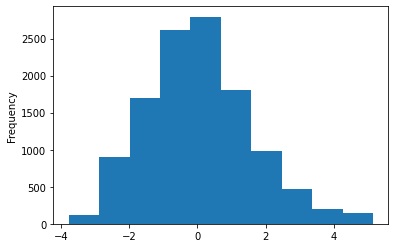

In [ ]:
hr_score_df['Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'].plot.hist()
# basically a normal curve

In [ ]:
# columns
hr_score_df.columns

Index(['Entity', 'Code', 'Year',
       'Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'],
      dtype='object')

In [ ]:
len(hr_score_df)

11717

In [ ]:
# missing
hr_score_df.isnull().sum()

Entity                                                            0
Code                                                              0
Year                                                              0
Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)    0
dtype: int64

## Merge

In [ ]:
len(hr_score_df['Code'].unique())

201

In [ ]:
len(UN_data_df['Country'].unique())

198

In [ ]:
hr_score_df.columns

Index(['Entity', 'Code', 'Year',
       'Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'],
      dtype='object')

In [ ]:
# drop country name column
# we do not need the the 'Entity' column because we will use the 'Code' column for the merge
hr_score_df = hr_score_df.drop('Entity', axis=1)

In [ ]:
# change code to country code
hr_score_df = hr_score_df.rename(columns={'Code':'Country', 'Year': 'year'})

In [ ]:
# merge on code and year 
UN_data_df = pd.merge(UN_data_df, hr_score_df, on=['Country', 'year'], how='left')

In [ ]:
UN_data_df.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377


In [ ]:
UN_data_df.isnull().sum()

Unnamed: 0                                                             0
rcid                                                                   0
ccode                                                                  0
member                                                            329201
vote                                                                   0
Country                                                                0
Countryname                                                            0
year                                                                   0
session                                                                0
abstain                                                             7157
yes                                                                  190
no                                                                 21383
importantvote                                                     135957
date                                               

### Save

In [ ]:
# save the vote_by_developed into a CSV (Resolution_by_Developed_Voting_Counts)
UN_data_df.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/output_data/UN_data_with_GDP_Developed_HR.csv', index = False)

## Upholds_HR Column

### Load

In [83]:
# human rights score data
hr_score_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/output_data/UN_data_with_GDP_Developed_HR.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
hr_score_df.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377


### Create column

1 = Upholds human rights >= 0

0 = Does not uphold human rights < 0 

In [ ]:
temp = hr_score_df.copy()

In [ ]:
temp['upholds_hr?'] = math.nan

In [ ]:
temp.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)",upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,NaN
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,NaN
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,NaN
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,NaN


In [ ]:
temp.loc[temp['Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'] >= 0, 'upholds_hr?'] = 1

In [ ]:
temp.loc[temp['Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'] < 0, 'upholds_hr?'] = 0

In [ ]:
temp.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)",upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


In [ ]:
temp.isnull().sum()
# same number of nulls 

Unnamed: 0                                                             0
rcid                                                                   0
ccode                                                                  0
member                                                            329201
vote                                                                   0
Country                                                                0
Countryname                                                            0
year                                                                   0
session                                                                0
abstain                                                             7157
yes                                                                  190
no                                                                 21383
importantvote                                                     135957
date                                               

### Rename all the columns and make them lower case

In [ ]:
# rename column ? and make all of the columns lower case
temp.columns = temp.columns.str.lower()

In [ ]:
temp.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp per capita (current us$),developed?,median_gdp,"human rights score (schnakenberg & fariss, 2014; fariss, 2019)",upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


In [ ]:
# rename two of the columns
# gdp per capita (current us$)
# human rights score (schnakenberg & fariss, 2014; fariss, 2019)
temp = temp.rename(columns={'gdp per capita (current us$)':'gdp_per_capita_(current us$)', 'human rights score (schnakenberg & fariss, 2014; fariss, 2019)' : 'human_rights_score'})

In [ ]:
temp.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


### Save

In [ ]:
# save the vote_by_developed into a CSV (Resolution_by_Developed_Voting_Counts)
temp.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/output_data/UN_data_with_GDP_Developed_HR.csv', index = False)